<a href="https://colab.research.google.com/github/kocurvik/edu/blob/master/RO/materialy/cv10/mnist_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt



Keras má predpripravené dáta z Datasetu MNIST. Načítame ich a a zobrazíme si jeden z obrázkov.

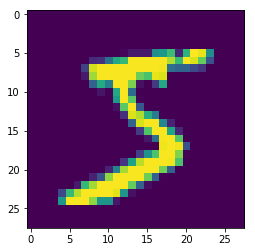

In [10]:
num_classes = 10
(x, y), (x_test, y_test) = mnist.load_data()

plt.imshow(x[0,:,:])
plt.show()

Obrázky sú v rozmeroch 28x28. Ak chceme použiť plne prepojenú sieť je nutné ich upraviť do vektorovej formy. Teda každý obrázok bude vektor s dimenziou 784. Trénovacie dáta si navyše rozdelíme na validačnú a trénovaciu množinu.

In [0]:
y_val = y[0:10000]
y_train = y[10000:]
x_val = np.reshape(x[0:10000],(10000,784)).\
            astype(np.float32)/255
x_train = np.reshape(x[10000:],(50000,784)).\
              astype(np.float32)/255

x_test = np.reshape(x_test,(10000,784)).\
              astype(np.float32)/255

Hodnoty v y-ových premenných označujú vždy len presne danú číslicu. My však chceme one-hot reprezentáciu.

In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Konečne môžeme pristúpiť k tvorbe modelu. Keďže použijeme len sekvenčný model, tak nám stačí popridávať plne prepojené vrstvy.

In [0]:
model = Sequential()
model.add(Dense(60, activation='sigmoid'))
model.add(Dense(30, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

Takto sme zatiaľ definovali štruktúru modelu. Je nutné mu pridať cenovú funkciu a trénovací algoritmus (toto vytvorí v tensorflowe štruktúru, ktorá zabezbečuje tréning).

In [0]:
loss = keras.losses.categorical_crossentropy
optimizer = keras.optimizers.Adam()
model.compile(loss=loss,
              optimizer=optimizer,
              metrics=['accuracy'])

V prípade, že si chceme ukladať model priebežne pri trénovaní môžeme odkomentovať túto časť.

In [0]:
callbacks = []
#checkpoint = keras.callbacks.ModelCheckpoint(
#    'mnist_{epoch:02d}-{val_loss:.8f}-{val_acc:.4f}.hdf5',
#    verbose=1)
#callbacks.append(checkpoint)

Model natrénujeme!

In [16]:
batch_size = 128
epochs = 40

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_val, y_val),
          callbacks=callbacks)

Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 2s 32us/step - loss: 1.2942 - acc: 0.7200 - val_loss: 0.6170 - val_acc: 0.8889
Epoch 2/40
50000/50000 [==============================] - 1s 27us/step - loss: 0.4487 - acc: 0.8999 - val_loss: 0.3372 - val_acc: 0.9180
Epoch 3/40
50000/50000 [==============================] - 1s 27us/step - loss: 0.3000 - acc: 0.9218 - val_loss: 0.2640 - val_acc: 0.9274
Epoch 4/40
50000/50000 [==============================] - 1s 26us/step - loss: 0.2418 - acc: 0.9343 - val_loss: 0.2225 - val_acc: 0.9393
Epoch 5/40
50000/50000 [==============================] - 1s 26us/step - loss: 0.2051 - acc: 0.9430 - val_loss: 0.1957 - val_acc: 0.9435
Epoch 6/40
50000/50000 [==============================] - 1s 27us/step - loss: 0.1782 - acc: 0.9500 - val_loss: 0.1770 - val_acc: 0.9505
Epoch 7/40
50000/50000 [==============================] - 1s 28us/step - loss: 0.1576 - acc: 0.9561 - val_loss: 0.1624 - val_acc

Natrénovný model môžeme spustiť na dáta jednotlivo. Je nutné ale pridať jednu singleton dimenziu.

[[2.8866818e-06 1.5042381e-06 9.5116569e-08 8.8020224e-06 1.2765067e-07
  4.1257513e-06 2.7703223e-11 9.9995673e-01 3.3378392e-06 2.2454749e-05]]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


<function matplotlib.pyplot.show>

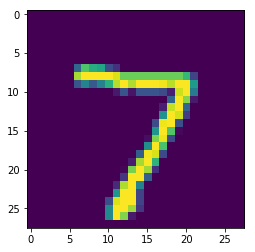

In [17]:
pred = model.predict(x_test[np.newaxis, 0, :])
print(pred)
print(y_test[0,:])
plt.imshow(np.reshape(x_test[0],(28,28)))
plt.show

Môžeme vyhodnotiť presnosť dát na testovacej množine.

In [18]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 0s 28us/step
Test loss: 0.11000788122622762
Test accuracy: 0.9716
